# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 573


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + "40e5782c35cae4c2df61b42a8921d44a"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | ulaangom
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | banswara
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | badger
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | kewarra beach
City not found. Skipping...
Processing Record 11 of Set 1 | marsa alam
Processing Record 12 of Set 1 | udachny
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 15 of Set 1 | aleksandrov gay
Processing Record 16 of Set 1 | hayma'
City not found. Skipping...
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | mormugao
Processing Record 19 of Set 1 | pau brasil
Processing Record 20 of Set 1 | rio

Processing Record 40 of Set 4 | padegan-e manjil
City not found. Skipping...
Processing Record 41 of Set 4 | sainte-anne-des-monts
Processing Record 42 of Set 4 | sao joao dos inhamuns
Processing Record 43 of Set 4 | funafuti
Processing Record 44 of Set 4 | tanjung selor
City not found. Skipping...
Processing Record 45 of Set 4 | eyl
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | ormara
Processing Record 48 of Set 4 | tazovsky
Processing Record 49 of Set 4 | uliastay
Processing Record 0 of Set 5 | khadyzhensk
Processing Record 1 of Set 5 | crumlin
Processing Record 2 of Set 5 | marcos juarez
Processing Record 3 of Set 5 | pathein
Processing Record 4 of Set 5 | chimore
Processing Record 5 of Set 5 | nafplio
Processing Record 6 of Set 5 | paphos
Processing Record 7 of Set 5 | saldanha
Processing Record 8 of Set 5 | uray
Processing Record 9 of Set 5 | fale old settlement
Processing Record 10 of Set 5 | atafu village
Processing Record 11 of Set 5 | maragogi
P

Processing Record 31 of Set 8 | val-d'or
Processing Record 32 of Set 8 | saint-joseph
Processing Record 33 of Set 8 | afif
Processing Record 34 of Set 8 | lianran
Processing Record 35 of Set 8 | nyurba
Processing Record 36 of Set 8 | san antonio del estrecho
City not found. Skipping...
Processing Record 37 of Set 8 | palapye
Processing Record 38 of Set 8 | port augusta
Processing Record 39 of Set 8 | coronel dorrego
Processing Record 40 of Set 8 | mitsamiouli
Processing Record 41 of Set 8 | yarmouth
Processing Record 42 of Set 8 | tolanaro
Processing Record 43 of Set 8 | khoyniki
Processing Record 44 of Set 8 | palmer
Processing Record 45 of Set 8 | coquimbo
Processing Record 46 of Set 8 | puerto rico
Processing Record 47 of Set 8 | bam
Processing Record 48 of Set 8 | bay roberts
Processing Record 49 of Set 8 | ulcinj
Processing Record 0 of Set 9 | tamanrasset
Processing Record 1 of Set 9 | rabaul
Processing Record 2 of Set 9 | kerema
Processing Record 3 of Set 9 | harper
Processing Re

-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,50.05,83,74,11.56,ZA,1685046868
1,ulaangom,49.9811,92.0667,46.44,50,99,4.88,MN,1685047045
2,bethel,41.3712,-73.4140,69.73,47,0,10.36,US,1685047045
3,banswara,23.5500,74.4500,84.74,60,47,12.84,IN,1685047045
4,port-aux-francais,-49.3500,70.2167,41.52,99,99,18.84,TF,1685047045


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data\cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data\cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,50.05,83,74,11.56,ZA,1685046868
1,ulaangom,49.9811,92.0667,46.44,50,99,4.88,MN,1685047045
2,bethel,41.3712,-73.4140,69.73,47,0,10.36,US,1685047045
3,banswara,23.5500,74.4500,84.74,60,47,12.84,IN,1685047045
4,port-aux-francais,-49.3500,70.2167,41.52,99,99,18.84,TF,1685047045


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

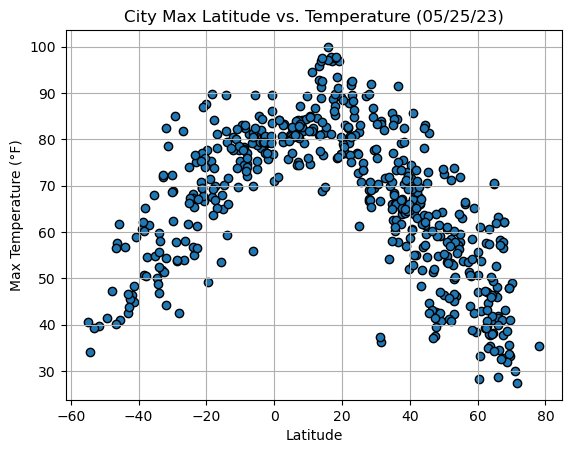

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

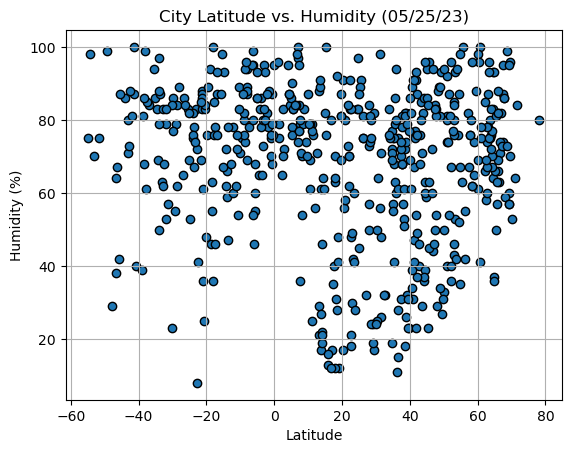

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

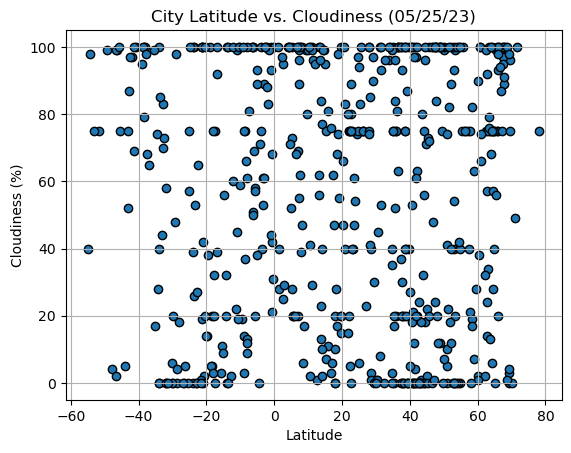

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data\Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

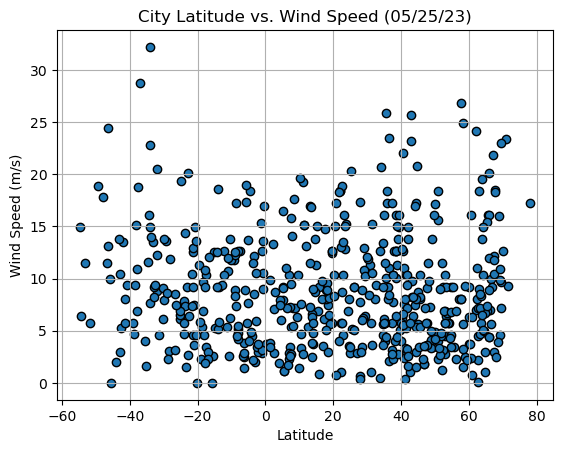

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data\Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title, save_filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line values
    regression_values = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot the regression line
    plt.plot(x_values, regression_values, color="red")
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.text(x_values.min(), y_values.max(), equation_text, color='red', fontsize=12, verticalalignment='top')
    
    # Return the r-value
    return rvalue


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ulaangom,49.9811,92.0667,46.44,50,99,4.88,MN,1685047045
2,bethel,41.3712,-73.4140,69.73,47,0,10.36,US,1685047045
3,banswara,23.5500,74.4500,84.74,60,47,12.84,IN,1685047045
5,badger,64.8000,-147.5333,70.38,37,75,1.01,US,1685046918
8,hamilton,39.1834,-84.5333,72.91,32,0,13.80,US,1685047046


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,50.05,83,74,11.56,ZA,1685046868
4,port-aux-francais,-49.3500,70.2167,41.52,99,99,18.84,TF,1685047045
6,port mathurin,-19.6833,63.4167,77.76,76,14,11.34,MU,1685046877
7,arraial do cabo,-22.9661,-42.0278,75.06,83,0,9.22,BR,1685047046
11,puerto natales,-51.7236,-72.4875,39.65,75,75,5.75,CL,1685047046


###  Temperature vs. Latitude Linear Regression Plot

The r-value for the Northern Hemisphere is: -0.8139835309691843


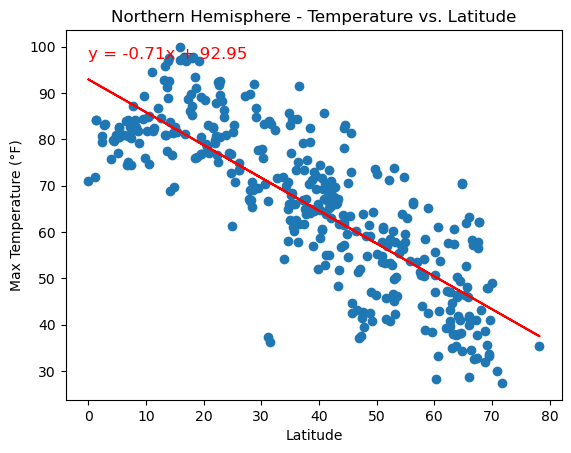

In [15]:
# Linear regression on Northern Hemisphere
r_value_northern = create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                              "Latitude", "Max Temperature (°F)", "Northern Hemisphere - Temperature vs. Latitude",
                              "output_data/northern_regression.png")
print(f"The r-value for the Northern Hemisphere is: {r_value_northern}")

The r-value for the Southern Hemisphere is: 0.7970733586720299


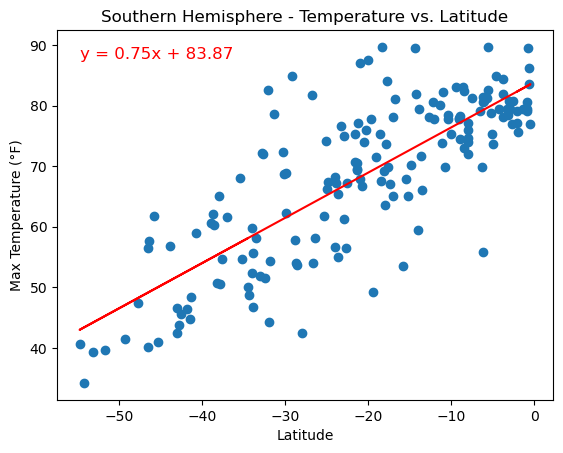

In [16]:
# Linear regression on Southern Hemisphere
r_value_southern = create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                              "Latitude", "Max Temperature (°F)", "Southern Hemisphere - Temperature vs. Latitude",
                              "output_data/southern_regression.png")
print(f"The r-value for the Southern Hemisphere is: {r_value_southern}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10066096533958865


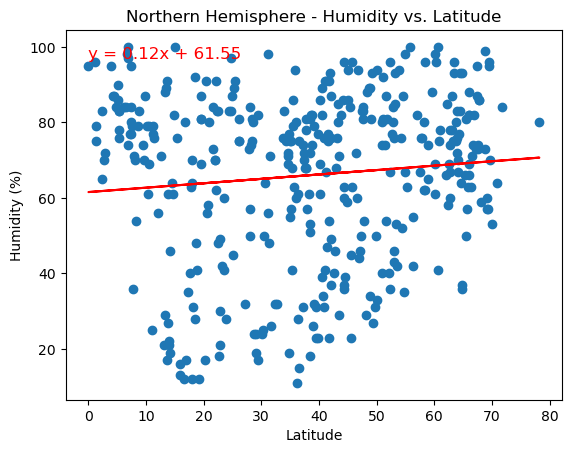

In [17]:
# Northern Hemisphere
r_value_northern = create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                              "Latitude", "Humidity (%)", "Northern Hemisphere - Humidity vs. Latitude",
                              "output_data/northern_regression_humidity.png")
print(f"The r-value is: {r_value_northern}")

The r-value is: 0.11053543689140059


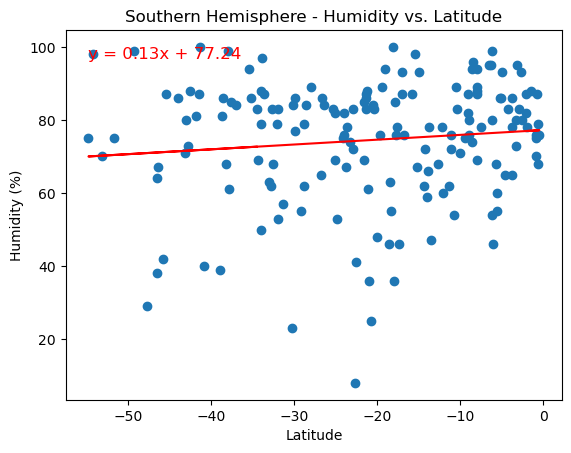

In [18]:
# Southern Hemisphere
r_value_southern = create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                              "Latitude", "Humidity (%)", "Southern Hemisphere - Humidity vs. Latitude",
                              "output_data/southern_regression_humidity.png")
print(f"The r-value is: {r_value_southern}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.011551733914980407


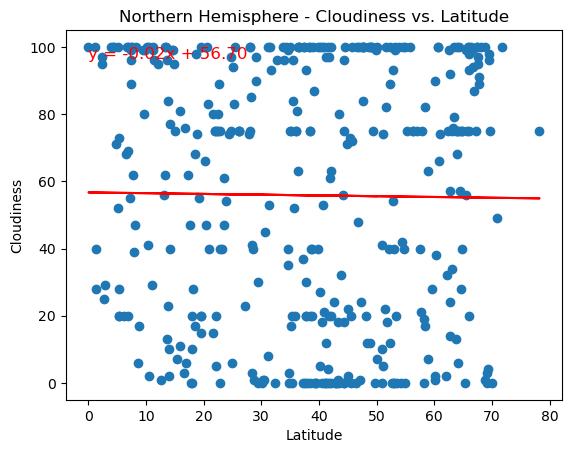

In [19]:
# Northern Hemisphere
r_value_northern = create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                              "Latitude", "Cloudiness", "Northern Hemisphere - Cloudiness vs. Latitude",
                              "output_data/northern_regression_cloudiness.png")
print(f"The r-value is: {r_value_northern}")

The r-value is: -0.017996112750585894


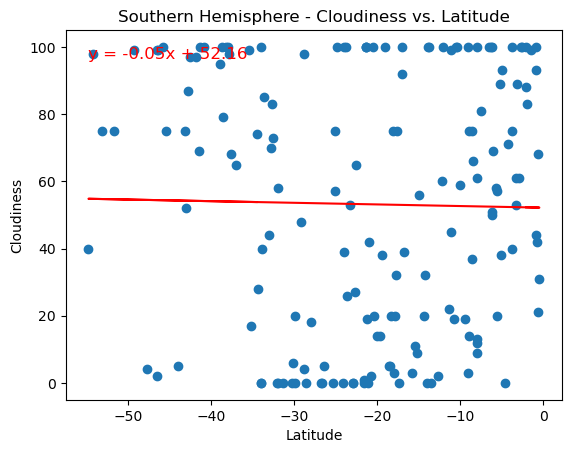

In [20]:
# Southern Hemisphere
r_value_southern = create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                              "Latitude", "Cloudiness", "Southern Hemisphere - Cloudiness vs. Latitude",
                              "output_data/southern_regression_cloudiness.png")
print(f"The r-value is: {r_value_southern}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04495965703206653


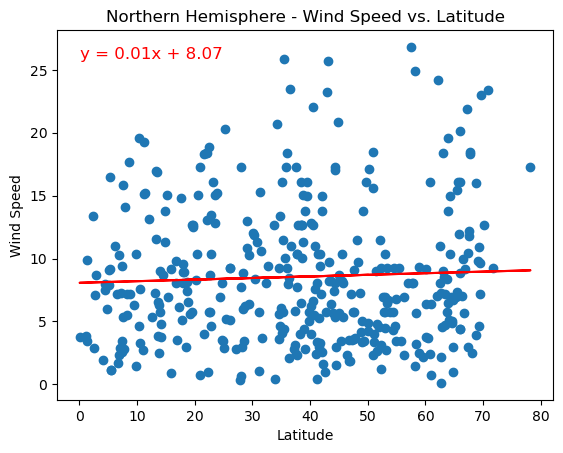

In [21]:
# Northern Hemisphere
r_value_northern = create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                              "Latitude", "Wind Speed", "Northern Hemisphere - Wind Speed vs. Latitude",
                              "output_data/northern_regression_wind_speed.png")
print(f"The r-value is: {r_value_northern}")

The r-value is: -0.19551932270961128


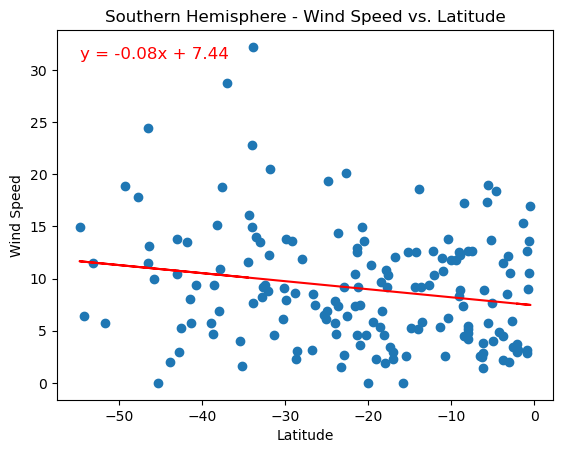

In [22]:
# Southern Hemisphere
r_value_southern = create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                              "Latitude", "Wind Speed", "Southern Hemisphere - Wind Speed vs. Latitude",
                              "output_data/southern_regression_wind_speed.png")
print(f"The r-value is: {r_value_southern}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE